# Para modelar el movimiento planetario

Queremos resolver el problema planetario, entonces tenemos como ecuación básica:

$$
\frac{dP}{dt}= -\frac{GMm}{\lvert r-r_{\mu}\rvert} \hat{(r-r_{\mu})} \ \ \ \ \ \dots (1)
$$

Y quisiéramos usarla para modelar orbitas, y cosas bonitas de estrellas...

Entonces lo primero que necesitamos es pedir que $z=\dot{z}=0$ para que el movimiento ocurra en el plano XY.

Y vamos a usar como origen a $r_{\mu}$, entonces la segunda derivada de la ecuación (1) se ve como:

$$
\frac{d^2P}{dt^2}= -\frac{GMm}{r^2} \hat{r}
$$

Utilizando el cambio de variable $t=t\sqrt{GM}$, entonces:

$$
\frac{d}{dt}=\frac{dt_1}{dt}\frac{dt}{dt_1}=\sqrt{GM}\frac{d}{dt_1}
$$
$$
\frac{d^2}{dt^2}=-GM\frac{d^2}{d{t_1}^2}
$$

Utilizando otro cambio de variable $\rho=\frac{r}{R_T}$ (donde $R_T$ es el promedio del radio de las órbitas).

$$
\frac{d^2}{dt^2}=-\frac{GM}{\rho^2{R_T}^3}\hat{\rho}
$$

Ahora bien, recordemos que el sistema que estamos estudiando es periódico, entonces, es útil reescribir la ecuación con otro cambio de variable:

$$
\tau=\sqrt{\frac{GM}{{R_T}^3}t}
$$

De ésta forma, la ecuación se convierte en:

$$
\frac{d^2}{dt^2}=-\frac{GM}{{R_T}^3}\frac{d^2}{d\tau^2}
$$

Ahora notemos que:

$$
\frac{d^2\rho}{d\tau^2}=-\frac{\hat{\rho}}{\rho^2}  \ \ \ \ \ \dots (2)
$$

Ahora bien, en particular, nuestro periodo $\tau$ puede ser de $2\pi$, y así obtenemos la tercera ley de keppler:

$$
\frac{(2\pi)^2}{GM}{R_T}^3=T^2
$$

Sin preámbulo, empecemos nuestro código para resolver la ecuación (2), pero antes traemos las funciones que hicimos para resolver ecuaciones diferenciales a 2do orden:

In [1]:
%run 'integradores_pro.ipynb'
#No estamos usando una libreria, estamos corriendo un notebook

In [2]:
def mov_planeta(x,t):
    r3 = (x[0]**2+x[1]**2)**(1.5)
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    #las cuatro variables de salida
    return array([drx,dry,dvrx,dvry])

def J_mov_planeta(x,t):
    d_ec = array([0,0,0,0])
    r5 = (x[0]**2+x[1]**2)**2.5
    rxmry = (2*x[0]*x[0]-x[1]*x[1])/r5
    rymrx = (2*x[1]*x[1]-x[0]*x[0])/r5
    rxry = (3*x[0]*x[1])/r5
    Jac = array([0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0])
    return d_ec, Jac

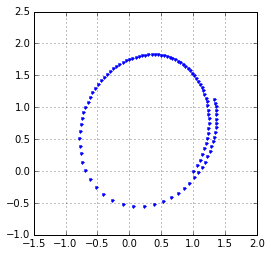

CPU times: user 181 ms, sys: 7.44 ms, total: 189 ms
Wall time: 187 ms


In [12]:
%%time
t,r_vr=runge_kutta2(mov_planeta,[1,0,.6,.9],[0,10],0.1)
xlim([-1.5,2]),ylim([-1,2.5])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

In [27]:
t,r_vr=runge_kutta2(mov_planeta,[1,0,.6,.9],[0,10],0.1)
plot(t[:,1],t[:,0])
show()

IndexError: too many indices

OBS: de la gráfica anterior podemos notar la parte del arco donde el planeta va más rápido!!

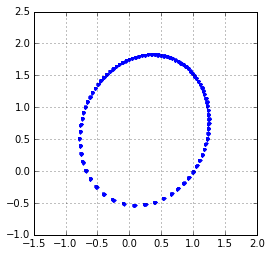

CPU times: user 256 ms, sys: 18.5 ms, total: 275 ms
Wall time: 263 ms


In [9]:
%%time
t,r_vr=runge_kutta4(mov_planeta,[1,0,.6,.9],[0,50],0.1)
xlim([-1.5,2]),ylim([-1,2.5])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

Cosas extra que no se para que vamos a usar

$$
\dot{\rho_x}=v_{\rho x} \ \ \ \dot{\rho_y}=V_{\rho y} \ \ \ \dot{V}_{\rho x}=\frac{-\rho_x}{\rho^3} \ \ \ \dot{V}_{\rho y}=\frac{-\rho_y}{\rho^3}
$$

El jacobiano va a ser:
$$
\left ( 
\begin{array}
0& 0& 1& 0\\
0& 0& 0& 1\\
\frac{2\rho_x^2 - \rho_y^2}{\rho^5}& \frac{3\rho_x\rho_y}{\rho^5}& 0& 0\\
\frac{3\rho_x\rho_y}& {\rho^5}\frac{2\rho_x^2 - \rho_y^2}{\rho^5}& 0& 0\\
\end{array} 
\right )
$$

In [6]:
%%time
t,r_vr=sin_nombre(mov_planeta,J_mov_planeta,[1,0,.6,.9],[0,10])
zoom=2
xlim([-zoom,zoom]), ylim([-zoom, zoom])
axes().set_aspect('equal'), grid(True)
plot(r_vr[:,0], r_vr[:,1], '.')
show()

ValueError: only 2 non-keyword arguments accepted